<div style='background-image: url("title01.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px'>
<div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
<div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computers, Waves, Simulations</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Finite-Difference Method - High-Order Taylor Operators</div>
        </div>
    </div>
</div>

#### This exercise covers the following aspects

* Learn how to define high-order central finite-difference operators
* Investigate the behaviour of the operators with increasing length

#### Basic Equations

The Taylor expansion of $f(x + dx)$ around $x$ is defined as 

$$
f(x+dx)=\sum_{n=0}^\infty \frac{f^{(n)}(x)}{n!}dx^{n}  
$$


Finite-difference operators can be calculated by seeking weights (here: $a$, $b$, $c$) with which function values have to be multiplied to obtain an interpolation or a derivative. Example:

$$
\begin{align}
a ~ f(x + dx) & \ = \ a ~ \left[ ~  f(x) +  f^{'} (x) dx +  \frac{1}{2!}  f^{''} (x) dx^2   + \dotsc  ~ \right] \\
b ~ f(x) & \  = \ b ~ \left[ ~  f(x)  ~ \right] \\
c ~ f(x - dx) & \ = \ c ~ \left[ ~  f(x) -  f^{'} (x) dx +  \frac{1}{2!}  f^{''} (x) dx^2   - \dotsc  ~ \right]
\end{align}
$$

This can  be expressed in matrix form by comparing coefficients, here seeking a 2nd derivative

$$
\begin{align}
&a  ~~+~~            ~~~~b           &+~~  c & = & 0 \\
&a  ~~\phantom{+}~~ \phantom{b}  &-~~  c & = & 0 \\
&a  ~~\phantom{+}~~ \phantom{b}  &+~~  c & = & \frac{2!}{\mathrm{d}x^2}
\end{align}
$$

which leads to 

$$
\begin{pmatrix}
  1 & 1 & 1 \\
  1 & 0 & -1 \\
  1 & 0 & 1
 \end{pmatrix}
\begin{pmatrix}
  a\\
 b \\
 c
 \end{pmatrix}
 =
 \begin{pmatrix}
  0\\
 0 \\
 \frac{2!}{dx^2}
 \end{pmatrix}
$$

and using matrix inversion we obtain 

$$
\begin{pmatrix}
a \\
b\\
c
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{2 \mathrm{d}x^2} \\
 - \frac{2}{2 \mathrm{d}x^2} \\
  \frac{1}{2 \mathrm{d}x^2}
\end{pmatrix}
$$

This is the the well known 3-point operator for the 2nd derivative. This can easily be generalized to higher point operators and higher order derivatives. Below you will find a routine that initializes the system matrix and solves for the Taylor operator. 

#### Calculating the Taylor operator

The subroutine `central_difference_coefficients()` initializes the system matrix and solves for the difference weights assuming $dx=1$. It calculates the centered differences using an arbitrary number of coefficients, also for higher derivatives. The weights are defined at $x\pm i dx$ and $i=0,..,(nop-1)/2$, where $nop$ is the length of the operator. Careful! Because it is centered $nop$ has to be an odd number (3,5,...)!

It returns a central finite difference stencil (a vector of length $nop$)  for the `n`th derivative.

In [1]:
# Import libaries
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define function to calculate Taylor operators
def central_difference_coefficients(nop, n):
    """
    Calculate the central finite difference stencil for an arbitrary number
    of points and an arbitrary order derivative.
    
    :param nop: The number of points for the stencil. Must be
        an odd number.
    :param n: The derivative order. Must be a positive number.
    """
    m = np.zeros((nop, nop))
    for i in range(nop):
        for j in range(nop):
            dx = j - nop // 2
            m[i, j] = dx ** i
    
    s = np.zeros(nop)
    s[n] = math.factorial(n)
    
    # The following statement return oper = inv(m) s
    oper = np.linalg.solve(m, s)
    # Calculate operator
    return oper

#### Plot Taylor operators

Investigate graphically the Taylor operators. Increase $nop$ for the first $n=1$ or higher order derivatives. Discuss the results and try to understand the interpolation operator (derivative order $n=0$).

In [3]:
# Calculate and plot Taylor operator

# Give length of operator (odd)
nop = 25
# Give order of derivative (0 - interpolation, 1 - first derivative, 2 - second derivative)
n = 1

# Get operator from routine 'central_difference_coefficients'
oper = central_difference_coefficients(nop, n)

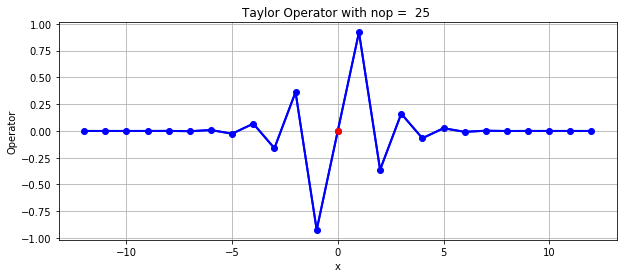

In [4]:
# To avoid testing (with py.test nbval ...) the plotting section 
# NBVAL_IGNORE_OUTPUT
# ----------------------------------------------------------------
# Plot operator
x = np.linspace(-(nop - 1) / 2, (nop - 1) / 2, nop)

# Simple plot with operator
plt.figure(figsize=(10, 4))
plt.plot(x, oper,lw=2,color='blue')
plt.plot(x, oper,lw=2,marker='o',color='blue')
plt.plot(0, 0,lw=2,marker='o',color='red')
#plt.plot (x, nder5-ader, label="Difference", lw=2, ls=":")
plt.title("Taylor Operator with nop =  %i " % nop )
plt.xlabel('x')
plt.ylabel('Operator')
plt.grid()
plt.show()

#### Conclusions
* The Taylor operator weights decrease rapidly with distance from the central point
* In practice often 4th order operators are used to calculate space derivatives